In [2]:
import ROOT
from root_numpy import root2array, tree2array
from root_numpy.testdata import get_filepath
import pandas as pd 
import csv 

Welcome to JupyROOT 6.08/06


/usr/local/lib/python2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.12.0. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
inputr = "~/ExoDiphotonAnalyzer.root"
newfile = ROOT.TFile(inputr)
gree = newfile.Get("/diphoton/fTree")
%jsroot on

In [4]:
import numpy as np
import matplotlib.pyplot as plt
newfile.ls()
import random

TFile**		/Users/up/ExoDiphotonAnalyzer.root	
 TFile*		/Users/up/ExoDiphotonAnalyzer.root	
  TDirectoryFile*		diphoton	diphoton
   OBJ: TTree	fTree	DiPhotonTree : 0 at: 0x7f9b65593710
   KEY: TTree	fTree;1	DiPhotonTree
  KEY: TDirectoryFile	diphoton;1	diphoton


# ROOT to CSV to dataframe

In [5]:
a=tree2array(gree)
al=a.tolist()
df = pd.DataFrame(a)
df.head()

,Event_ptHat,Event_alphaqcd,Event_alphaqed,Event_qscale,Event_weight0,Event_weight,Event_run,Event_LS,Event_evnum,Event_processid,...,GenDiphotonUnstable_cosThetaStar,GenDiphotonUnstable_cosThetaStarOld,GenDiphotonStable_Minv,GenDiphotonStable_qt,GenDiphotonStable_deltaPhi,GenDiphotonStable_deltaEta,GenDiphotonStable_deltaR,GenDiphotonStable_deltaROld,GenDiphotonStable_cosThetaStar,GenDiphotonStable_cosThetaStarOld
0,0.0,0.091921,0.008074,1500.153687,1.0,1.0,1,9,1345,5001,...,-0.968518,0.946881,1500.153720,72.759681,3.078993,-4.290682,5.281112,5.281112,-0.968518,0.946881
1,0.0,0.091915,0.008074,1501.112671,1.0,1.0,1,9,1346,5001,...,0.544505,0.462591,1501.112651,200.798623,2.892044,1.302434,3.171790,3.171790,0.544505,0.462591
2,0.0,0.091922,0.008074,1500.031494,1.0,1.0,1,9,1347,5001,...,-0.776134,0.752600,1500.031507,81.003337,3.070133,-2.156230,3.751672,3.751672,-0.776134,0.752600
3,0.0,0.091924,0.008074,1499.646606,1.0,1.0,1,9,1348,5002,...,-0.703112,0.657329,1499.646572,28.629856,-3.132299,-1.755129,3.590511,3.590511,-0.703112,0.657329
4,0.0,0.091920,0.008074,1500.249512,1.0,1.0,1,9,1349,5001,...,-0.142218,0.004965,1500.249524,81.522381,-3.080136,-0.300952,3.094804,3.094804,-0.142218,0.004965


We can see that it works! Next we do some plots and some cuts. 
We can make new dataframes with some columns dropped

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 176 entries, Event_ptHat to GenDiphotonStable_cosThetaStarOld
dtypes: bool(46), float32(7), float64(90), int32(33)
memory usage: 8.8 MB


## Plotting

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

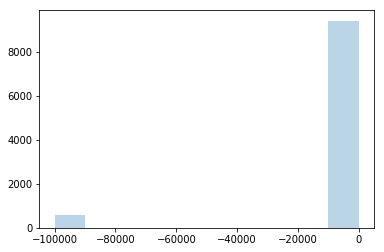

In [8]:
plt.hist(df.GenDiphotonStable_cosThetaStar, alpha=.3)
#sns.distplot(df.photon1_eta);
plt.show()

(array([  601.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9399.]),
 array([ -9.99999900e+04,  -8.99998910e+04,  -7.99997920e+04,
         -6.99996930e+04,  -5.99995940e+04,  -4.99994950e+04,
         -3.99993960e+04,  -2.99992970e+04,  -1.99991980e+04,
         -9.99909900e+03,   9.99996341e-01]),
 <a list of 10 Patch objects>)

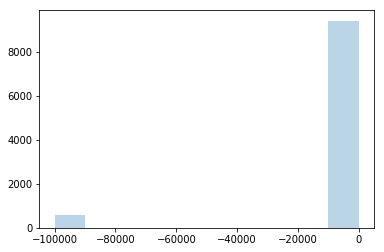

In [8]:
plt.hist(df.GenDiphotonStable_cosThetaStarOld, alpha=.3)

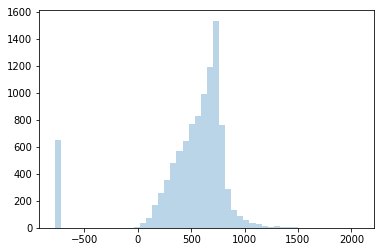

In [9]:
plt.hist(df.Photon1_pt, alpha=.3, bins=50)
plt.show()

In [10]:
df.shape    

(10000, 176)

In [11]:
#df[df.Photon1_pt>0]

In [12]:
%%capture
df[df.Photon1_pt>0][df.Photon2_pt>0].GenDiphotonStable_cosThetaStar

In [13]:
%%capture
df[df.Photon1_pt>0].Diphoton_cosThetaStar

(array([ 184.,  285.,  289.,  263.,  251.,  240.,  228.,  219.,  173.,
         189.,  203.,  170.,  176.,  145.,  171.,  131.,  107.,  132.,
         124.,  100.,   88.,  117.,  102.,   98.,  113.,  100.,   97.,
         103.,   97.,  114.,  119.,  113.,  141.,  125.,  133.,  150.,
         150.,  161.,  189.,  189.,  185.,  191.,  191.,  224.,  258.,
         256.,  252.,  267.,  268.,  200.]),
 array([ -9.99233410e-01,  -9.59249844e-01,  -9.19266278e-01,
         -8.79282711e-01,  -8.39299145e-01,  -7.99315579e-01,
         -7.59332012e-01,  -7.19348446e-01,  -6.79364880e-01,
         -6.39381313e-01,  -5.99397747e-01,  -5.59414180e-01,
         -5.19430614e-01,  -4.79447048e-01,  -4.39463481e-01,
         -3.99479915e-01,  -3.59496349e-01,  -3.19512782e-01,
         -2.79529216e-01,  -2.39545650e-01,  -1.99562083e-01,
         -1.59578517e-01,  -1.19594950e-01,  -7.96113840e-02,
         -3.96278177e-02,   3.55748687e-04,   4.03393151e-02,
          8.03228814e-02,   1.20306448e-01

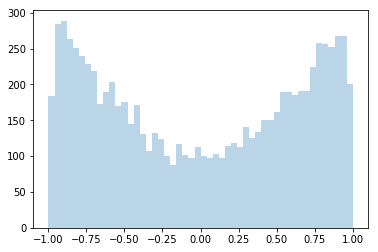

In [14]:
plt.hist(df[df.Photon1_pt>0][df.Photon2_pt>0].GenDiphotonStable_cosThetaStar, alpha=.3, bins=50)

In [15]:
events = df[df.Photon1_pt>0][df.Photon2_pt>0].GenDiphotonUnstable_cosThetaStar.shape
df[df.Photon1_pt>0][df.Photon2_pt>0].GenDiphotonUnstable_cosThetaStar.shape


(8571,)

(array([ 184.,  285.,  289.,  263.,  251.,  240.,  228.,  219.,  173.,
         189.,  203.,  170.,  176.,  145.,  171.,  131.,  107.,  132.,
         124.,  100.,   88.,  117.,  102.,   98.,  113.,  100.,   97.,
         103.,   97.,  114.,  119.,  113.,  141.,  125.,  133.,  150.,
         150.,  161.,  189.,  189.,  185.,  191.,  191.,  224.,  258.,
         256.,  252.,  267.,  268.,  200.]),
 array([ -9.99233410e-01,  -9.59249844e-01,  -9.19266278e-01,
         -8.79282711e-01,  -8.39299145e-01,  -7.99315579e-01,
         -7.59332012e-01,  -7.19348446e-01,  -6.79364880e-01,
         -6.39381313e-01,  -5.99397747e-01,  -5.59414180e-01,
         -5.19430614e-01,  -4.79447048e-01,  -4.39463481e-01,
         -3.99479915e-01,  -3.59496349e-01,  -3.19512782e-01,
         -2.79529216e-01,  -2.39545650e-01,  -1.99562083e-01,
         -1.59578517e-01,  -1.19594950e-01,  -7.96113840e-02,
         -3.96278177e-02,   3.55748687e-04,   4.03393151e-02,
          8.03228814e-02,   1.20306448e-01

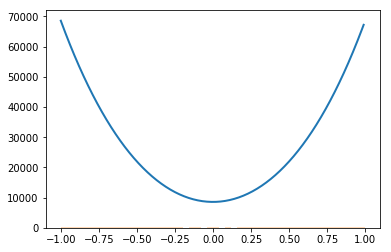

In [25]:
x = np.arange(-1.0, 1.0, 0.01)
s = events*(1 + 6*x**2+x**4)
#line, = plt.plot(x, s, lw=2)
plt.plot(x, s, lw=2)
plt.hist(df[df.Photon1_pt>0][df.Photon2_pt>0].GenDiphotonUnstable_cosThetaStar, alpha=.3, bins=50)
#g = [random.gauss(3,1) for _ in range(400)]
#y = [random.gauss(4,2) for _ in range(400)]

#bins = np.linspace(-10, 10, 100)

#plt.hist(g, bins, alpha=0.5, label='x')
#plt.hist(y, bins, alpha=0.5, label='y')
#plt.legend(loc='upper right')
#plt.show()

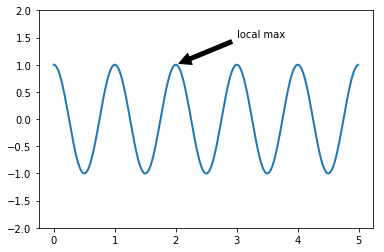

In [26]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

#(1+6*pow(x,2)+pow(x,4))
x = np.arange(-1.0, 1.0, 0.01)
s = 1 + 6*x**2+x**4
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

#plt.ylim(-2,2)
plt.show()